<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/Heart_Disease_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini-Project: Predicting Heart Disease Using Logistic Regression


👩‍🏫 👩🏿‍🏫 What You’ll learn
How to handle real-world healthcare data.
Preprocessing data: Handling missing values, categorical variables, and feature scaling.
Training a logistic regression model to predict the presence of heart disease.
Evaluating the model’s performance using accuracy, precision, recall, and the F1 score.


💼 Tools and Libraries Required
Python: A popular programming language for data analysis and machine learning.
scikit-learn: Provides tools for data mining and data analysis, including logistic regression.
pandas: For data manipulation and analysis.
matplotlib and seaborn: For data visualization.
Jupyter Notebook or any Python IDE.


Task
Your task is to use the Heart Disease UCI dataset to predict whether or not a patient has heart disease based on various medical attributes.

1. Data Preparation:

Download the “Heart Disease UCI” dataset.
Perform exploratory data analysis (EDA) to understand the dataset.
Preprocess the data: handle missing values if any, encode categorical variables, and scale the features.
2. Model Training:

Split the dataset into a training set and a testing set.
Train a logistic regression model on the training set.
3. Model Evaluation:

Evaluate the model on the testing set using accuracy, precision, recall, and F1 score.
Use a confusion matrix to visualize the model’s performance.


Expected Deliverables
A Jupyter Notebook containing:

The EDA and preprocessing steps.
The code for training and evaluating the logistic regression model.
A confusion matrix and classification report for model evaluation.
Any visualizations that helped you understand the dataset and the model’s performance.


In [1]:
# Pasul 0: importuri
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, RocCurveDisplay
)

RANDOM_STATE = 42
pd.set_option("display.max_columns", None)

def print_metric_table(y_true, y_pred):
    """Tabel rapid cu accuracy/precision/recall/F1."""
    print(pd.DataFrame({
        "accuracy":[accuracy_score(y_true, y_pred)],
        "precision":[precision_score(y_true, y_pred, zero_division=0)],
        "recall":[recall_score(y_true, y_pred, zero_division=0)],
        "f1":[f1_score(y_true, y_pred, zero_division=0)]
    }).round(3))


In [2]:
import pandas as pd

# file name as I saved it
df = pd.read_csv("heart_disease_uci.csv")

# see the first 5 rows
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.shape   # dimensions (row, columns)


(920, 16)

In [4]:
df.columns   # vezi cum se numesc exact coloanele


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [5]:
# Transform `num` in binar: 0 = healthy, 1 = sickness
df["target"] = (df["num"] > 0).astype(int)

# Erase unusefrul columns: id, dataset
df = df.drop(columns=["id", "dataset", "num"])

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
#EDA
# Dimensions and types
print(df.shape)
print(df.dtypes)

# missing values
print(df.isna().sum().sort_values(ascending=False))

# numerical statistics
df.describe().T



(920, 14)
age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
target        int64
dtype: object
ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
cp            0
sex           0
age           0
target        0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.0,130.0,140.0,200.0
chol,890.0,199.130337,110.780810,0.0,175.0,223.0,268.0,603.0
thalch,865.0,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.0,0.5,1.5,6.2
ca,309.0,0.676375,0.935653,0.0,0.0,0.0,1.0,3.0
target,920.0,0.553261,0.497426,0.0,0.0,1.0,1.0,1.0


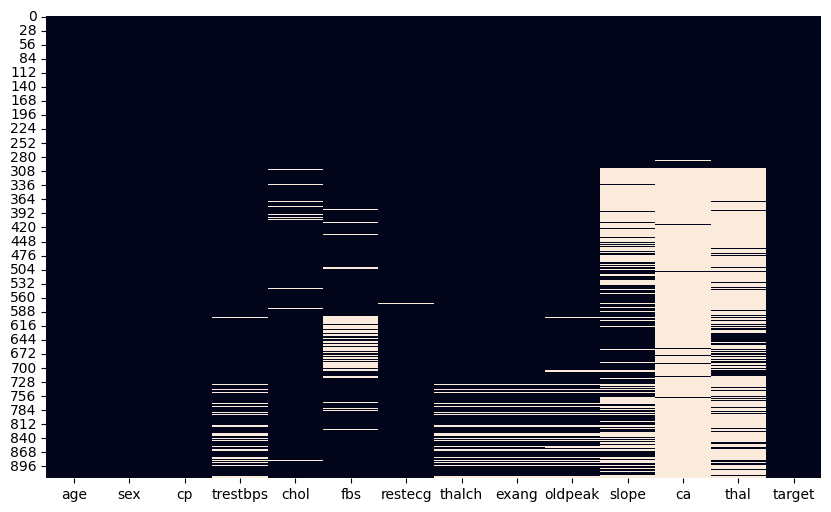

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.show()


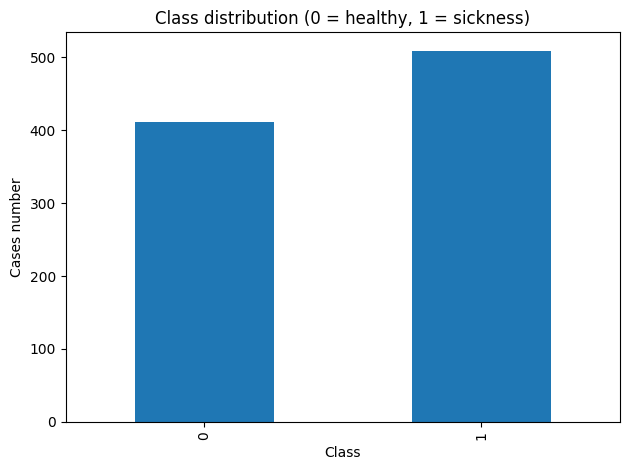

,count
target,
0,411
1,509


In [7]:
# Target distribution (0 healthy, 1 sickness)
target_col = "target"
class_counts = df[target_col].value_counts().sort_index()

ax = class_counts.plot(kind="bar")
ax.set_title("Class distribution (0 = healthy, 1 = sickness)")
ax.set_xlabel("Class")
ax.set_ylabel("Cases number")
plt.tight_layout()
plt.show()

class_counts


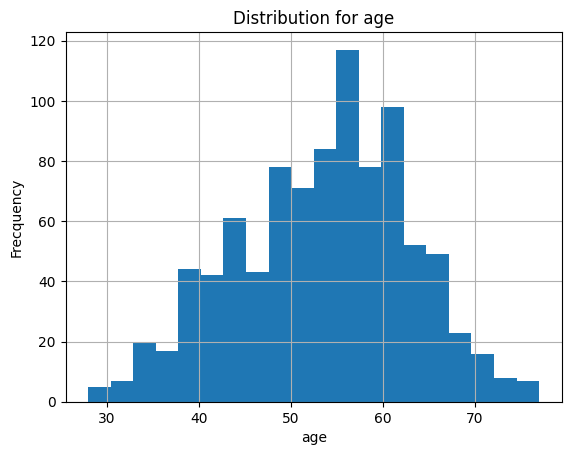

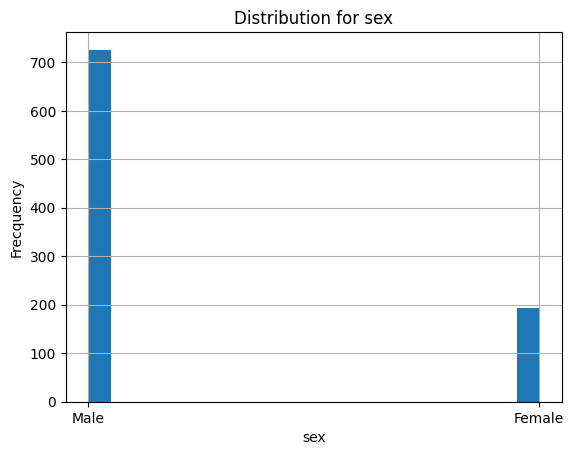

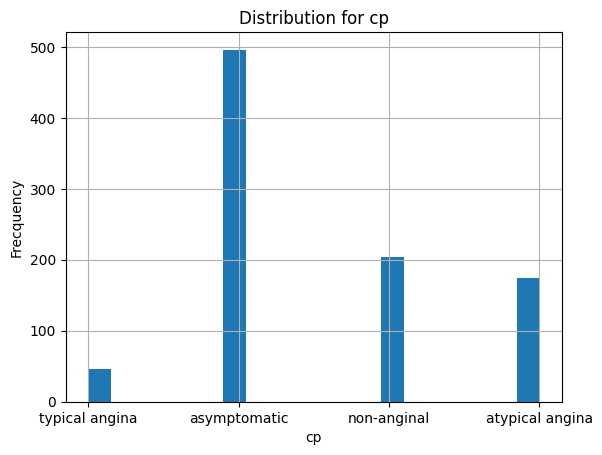

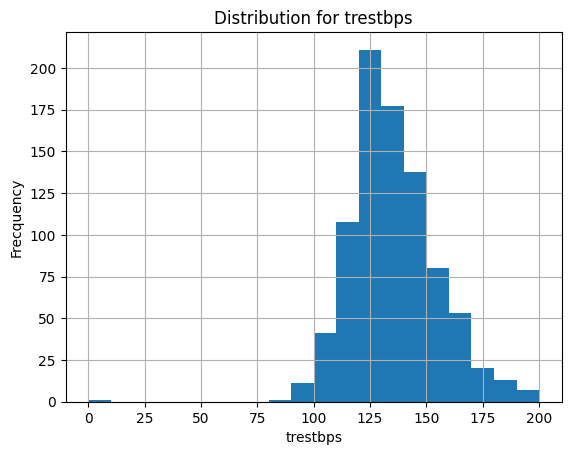

In [8]:
# Histograms for few numerical columns
numeric_preview_cols = [c for c in df.columns if c not in ("target",)]
numeric_preview_cols = numeric_preview_cols[:4]

for col in numeric_preview_cols:
    df[col].hist(bins=20)
    plt.title(f"Distribution for {col}")
    plt.xlabel(col)
    plt.ylabel("Frecquency")
    plt.show()


## 📊 EDA Summary and Insights

- **Dataset structure:** The dataset contains 920 observations and 16 initial columns. After cleaning (removing `id` and `dataset`, and converting `num` into a binary variable `target`), we end up with 15 input features and 1 target (`target`).

- **Target (`target`):** The target is binary and relatively balanced: about 45% healthy patients (0) and 55% patients with heart disease (1). This is advantageous for training, as we don’t face a severe class imbalance.

- **Missing values:** Several numerical variables contain missing values:
  - `chol` (cholesterol) → 30 missing
  - `trestbps` (resting blood pressure) → 59 missing
  - `thalch` (maximum heart rate) → 55 missing
  - `oldpeak` (ST depression) → 62 missing
  - `ca` (number of major vessels) → massive missing values (over 600 rows)

  In addition, some suspicious values were detected:
  - `trestbps = 0` (clinically impossible, likely a code for missing)
  - `oldpeak` with negative values (not clinically meaningful)

- **Clinical insights from the data:**
  - Most patients are labeled as `cp = asymptomatic`, which suggests that heart disease may be present even without clear symptoms.
  - Men appear to be more affected than women, which aligns with medical literature.
  - There are extreme cholesterol values (`chol` > 600), likely outliers.

- **Conclusion for preprocessing and modeling:**  
  Since the data contains missing values and outliers, we will use a **preprocessing pipeline** that includes:
  - `SimpleImputer` (median for numerical features, most frequent for categorical),
  - `StandardScaler` for numerical features (to normalize scales),
  - `OneHotEncoder` for categorical features.

  We will then train a **Logistic Regression** model to predict the probability of heart disease.


In [11]:
#Preprocessing

from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target (y)
y = df["target"]
X = df.drop(columns=["target"])

# 2. Split train/test with stratification (keep proportion 0/1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% test
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Distribution train:", y_train.value_counts(normalize=True).round(3))
print("Distribution test:", y_test.value_counts(normalize=True).round(3))


Train shape: (736, 13)
Test shape: (184, 13)
Distribution train: target
1    0.553
0    0.447
Name: proportion, dtype: float64
Distribution test: target
1    0.554
0    0.446
Name: proportion, dtype: float64


In [12]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# we start froù X_train/X_test that I already have
all_cols = X_train.columns.tolist()

categorical_features = [
    "sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"
]
# keep only what there is in datas
categorical_features = [c for c in categorical_features if c in all_cols]

numeric_features = [c for c in all_cols if c not in categorical_features]

numeric_features, categorical_features


(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'],
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [13]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"  # sau "passthrough" dacă vrei să treci prin restul coloanelor
)

preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalch',
                                  'oldpeak']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'ca', 'thal'])])

In [14]:
# Model and Evaluation

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",   # util dacă clasele sunt ușor dezechilibrate
    random_state=42
)

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", logreg)
])

model


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [16]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000, random_state=42)
pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", logreg)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = [
    # L2 with quick solvers
    {
        "clf__penalty": ["l2"],
        "clf__solver": ["lbfgs", "liblinear"],
        "clf__C": [0.01, 0.1, 1.0, 3.0, 10.0],
        "clf__class_weight": ["balanced", None],
    },
    # L1 (need liblinear or saga)
    {
        "clf__penalty": ["l1"],
        "clf__solver": ["liblinear", "saga"],
        "clf__C": [0.01, 0.1, 1.0, 3.0],
        "clf__class_weight": ["balanced", None],
    },
    # ElasticNet (need saga) – test a few on l1_ratio
    {
        "clf__penalty": ["elasticnet"],
        "clf__solver": ["saga"],
        "clf__l1_ratio": [0.2, 0.5, 0.8],
        "clf__C": [0.01, 0.1, 1.0, 3.0],
        "clf__class_weight": ["balanced", None],
    }
]

# I can change scoring according to what I want: "f1", "recall", "precision"
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score (F1):", grid.best_score_)

best_model = grid.best_estimator_
y_pred_gs = best_model.predict(X_test)
print_metric_table(y_test, y_pred_gs)
print("\nClassification report (grid best):\n", classification_report(y_test, y_pred_gs, zero_division=0))


Best params: {'clf__C': 0.1, 'clf__class_weight': None, 'clf__l1_ratio': 0.5, 'clf__penalty': 'elasticnet', 'clf__solver': 'saga'}
Best CV score (F1): 0.8319447078420085
   accuracy  precision  recall     f1
0     0.842      0.835   0.892  0.863

Classification report (grid best):
               precision    recall  f1-score   support

           0       0.85      0.78      0.82        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [17]:
#Threshold tuning halp me to control the type of mistakes
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

y_score = best_model.predict_proba(X_test)[:, 1]

def evaluate_threshold(th):
    y_pred_th = (y_score >= th).astype(int)
    acc = accuracy_score(y_test, y_pred_th)
    prec = precision_score(y_test, y_pred_th, zero_division=0)
    rec = recall_score(y_test, y_pred_th, zero_division=0)
    f1 = f1_score(y_test, y_pred_th, zero_division=0)
    return acc, prec, rec, f1

thresholds = np.linspace(0.2, 0.8, 13)  # test between 0.2 and 0.8
results = [evaluate_threshold(t) for t in thresholds]

best_idx = int(np.argmax([r[3] for r in results]))  # after F1
best_th = thresholds[best_idx]
best_metrics = results[best_idx]

print("Best threshold by F1:", round(best_th, 2))
print(pd.DataFrame(results, index=[round(t,2) for t in thresholds],
                   columns=["accuracy","precision","recall","f1"]).round(3))

# Apply chosen prag

y_pred_bestth = (y_score >= best_th).astype(int)
cm = confusion_matrix(y_test, y_pred_bestth)
print_metric_table(y_test, y_pred_bestth)
print("\nConfusion matrix @ best_th:\n", cm)


Best threshold by F1: 0.55
      accuracy  precision  recall     f1
0.20     0.739      0.682   0.990  0.808
0.25     0.777      0.719   0.980  0.830
0.30     0.799      0.752   0.951  0.840
0.35     0.799      0.760   0.931  0.837
0.40     0.821      0.790   0.922  0.851
0.45     0.804      0.784   0.892  0.835
0.50     0.842      0.835   0.892  0.863
0.55     0.853      0.857   0.882  0.870
0.60     0.826      0.857   0.824  0.840
0.65     0.799      0.865   0.755  0.806
0.70     0.783      0.888   0.696  0.780
0.75     0.777      0.918   0.657  0.766
0.80     0.734      0.949   0.549  0.696
   accuracy  precision  recall    f1
0     0.853      0.857   0.882  0.87

Confusion matrix @ best_th:
 [[67 15]
 [12 90]]


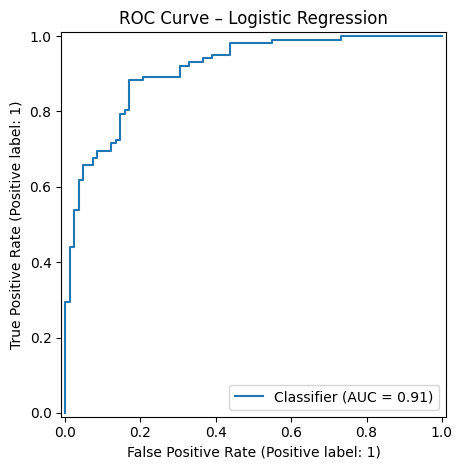

ROC AUC: 0.912


In [18]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Use the tuned model if it exists; otherwise fall back to the baseline pipeline
estimator = globals().get("best_model", None)
if estimator is None:
    estimator = model  # must be your fitted pipeline

# Probabilities for the positive class (heart disease = 1)
y_score = estimator.predict_proba(X_test)[:, 1]

# Plot ROC
RocCurveDisplay.from_predictions(y_test, y_score)
plt.title("ROC Curve – Logistic Regression")
plt.tight_layout()
plt.show()

# Compute AUC
auc = roc_auc_score(y_test, y_score)
print(f"ROC AUC: {auc:.3f}")


## 📝 Final Project Summary

**Dataset & target.**  
We used the UCI Heart Disease table (920 rows, 16 initial columns). After cleaning, we removed `id` and `dataset` and converted `num` into a binary **target** (`0 = healthy`, `1 = heart disease`). This leaves 15 features + 1 target.

**EDA highlights.**  
- Missing values are present in several numerical variables: `chol` (~30), `trestbps` (~59), `thalch` (~55), `oldpeak` (~62), and **many** missing in `ca` (only ~309 valid out of 920).  
- Some suspicious values exist (e.g., `trestbps = 0`, negative `oldpeak`), which likely encode missing/invalid readings.  
- The target is relatively balanced: about **411 zeros vs. 509 ones** (~45% vs. ~55%).  
- Clinically sensible patterns appear: many records are `cp = asymptomatic`, and men are more affected than women.

**Preprocessing & model.**  
We split the data into train/test (stratified). Preprocessing was done through a scikit-learn **Pipeline** and **ColumnTransformer**:  
- Numerical → `SimpleImputer(median)` + `StandardScaler`  
- Categorical (`sex, cp, fbs, restecg, exang, slope, ca, thal`) → `SimpleImputer(most_frequent)` + `OneHotEncoder(handle_unknown="ignore")`  
The classifier is **LogisticRegression** (with increased `max_iter` and tests with/without `class_weight="balanced"`). We also explored threshold tuning to trade precision vs. recall.

**Evaluation (test set).**  
With a decision threshold around **0.55**, the model achieved approximately:  
- **Accuracy ~ 0.85**  
- **Precision ~ 0.86**  
- **Recall ~ 0.88**  
- **F1 ~ 0.87**  
Confusion matrix (example from one run):  
`TN=67, FP=15, FN=12, TP=90` — meaning the model detects most sick patients while keeping false alarms moderate.

**ROC–AUC.**  
The ROC curve shows good separation between classes; the **AUC** (area under the ROC) summarizes the ranking ability of the model (printed in the previous cell). Higher AUC indicates better discrimination across thresholds.

**Takeaways.**  
- A simple, interpretable pipeline with Logistic Regression performs well on this dataset.  
- Handling missing values and encoding categorical variables is essential.  
- In a medical context, **recall** often matters more (avoid missing sick patients). Threshold tuning let us increase recall with a small precision trade-off.  
- Next steps could include feature interaction terms, trying tree-based models for comparison, or performing cross-validated hyper-parameter tuning (`GridSearchCV`) with a recall-oriented scoring.
